# MICROCHIP IMAGES:
1. proc_bkgd_1x2_3
2. proc_bkgd_1x4_2
3. proc_bkgd_2x1_1
4. proc_bkgd_2x1_2
5. proc_bkgd_2x2_1

In [1]:
from functions_py import *
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

# PERFORMANCE 

In [3]:
def AnaProcM(path,v=False):
    csv_name='AnaParams'+path.replace('/share/storage2/connie/data/microchip/proc_bkgd', '')+'.csv'

    sigma_list=[]
    sigma_err_list=[]
    gain_list=[]
    gain_err_list=[]
    imgID_list=[]
    chids=[]
    
    for path in glob.glob(path+'/proc_skp_*.fits'):
        imgID = re.findall( "_img([0-9]+).fits", path )[0]
        hdu_list = fits.open(path)
        data_pre = precal(hdu_list,extensions=4)
        gain, gain_err, data= LocalCalib(data_pre,extensions=4)
        sigma, sigma_err = LocalSigma(data,extensions=4)
        sigma_list+=sigma
        sigma_err_list+=sigma_err
        gain_list+=gain
        gain_err_list+=gain_err
        imgID_list+=[imgID]*4
        chids+=[0,1,2,3]
        if v==True:
            for i in range(4):
                print("CHID "+str(i)+' Gain:({:.2f} +- {:.2f})ADUs'.format(gain[i],gain_err[i])+r'| Noise: ({:.3f} +- {:.3f}) e-'.format(sigma[i],sigma_err[i]))
    dict={'CHID':chids, 'IMGID':imgID_list, 'Gain': gain_list, 'Gain_err': gain_err_list, 'Noise': sigma_list, 'Noise_err': sigma_err_list}
    df=pd.DataFrame.from_dict(dict)
    df.to_csv(csv_name,index=False)
    print('Done!')

In [4]:
path_to_img='/share/storage2/connie/data/microchip/'

for p in ["proc_bkgd_1x2_3", "proc_bkgd_1x4_2", "proc_bkgd_2x1_1", "proc_bkgd_2x1_2", "proc_bkgd_2x2_1"]:
    AnaProcM(path_to_img+p)

Done!
Done!
Done!
Done!
Done!


# Parameters Plots

In [3]:
glob.glob('/home/zilvespedro/work/MICROCHIP/MANA/AnaParamsCSV/*csv')

['/home/zilvespedro/work/MICROCHIP/MANA/AnaParamsCSV/AnaParams_1x10_1.csv',
 '/home/zilvespedro/work/MICROCHIP/MANA/AnaParamsCSV/AnaParams_1x10_2.csv',
 '/home/zilvespedro/work/MICROCHIP/MANA/AnaParamsCSV/AnaParams_1x10_3.csv',
 '/home/zilvespedro/work/MICROCHIP/MANA/AnaParamsCSV/AnaParams_1x2_1.csv',
 '/home/zilvespedro/work/MICROCHIP/MANA/AnaParamsCSV/AnaParams_1x2_2.csv',
 '/home/zilvespedro/work/MICROCHIP/MANA/AnaParamsCSV/AnaParams_1x2_3.csv',
 '/home/zilvespedro/work/MICROCHIP/MANA/AnaParamsCSV/AnaParams_1x4_1.csv',
 '/home/zilvespedro/work/MICROCHIP/MANA/AnaParamsCSV/AnaParams_1x4_2.csv',
 '/home/zilvespedro/work/MICROCHIP/MANA/AnaParamsCSV/AnaParams_2x1_1.csv',
 '/home/zilvespedro/work/MICROCHIP/MANA/AnaParamsCSV/AnaParams_2x1_2.csv',
 '/home/zilvespedro/work/MICROCHIP/MANA/AnaParamsCSV/AnaParams_2x2_1.csv',
 '/home/zilvespedro/work/MICROCHIP/MANA/AnaParamsCSV/AnaParams_2x2_2.csv']

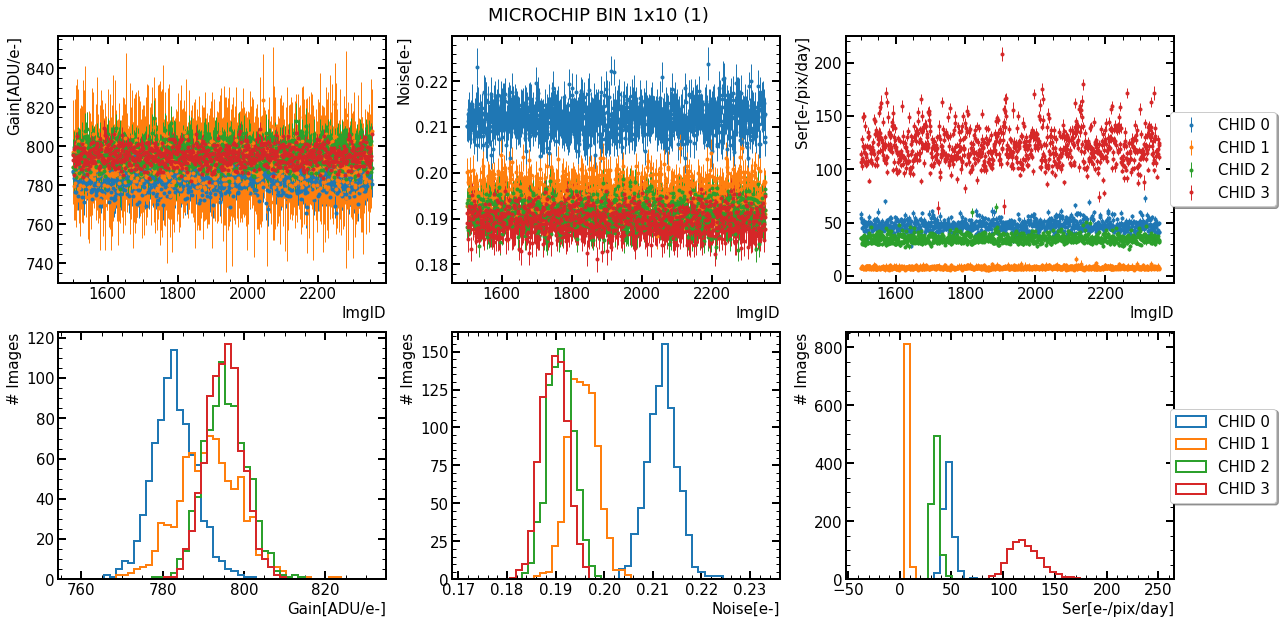

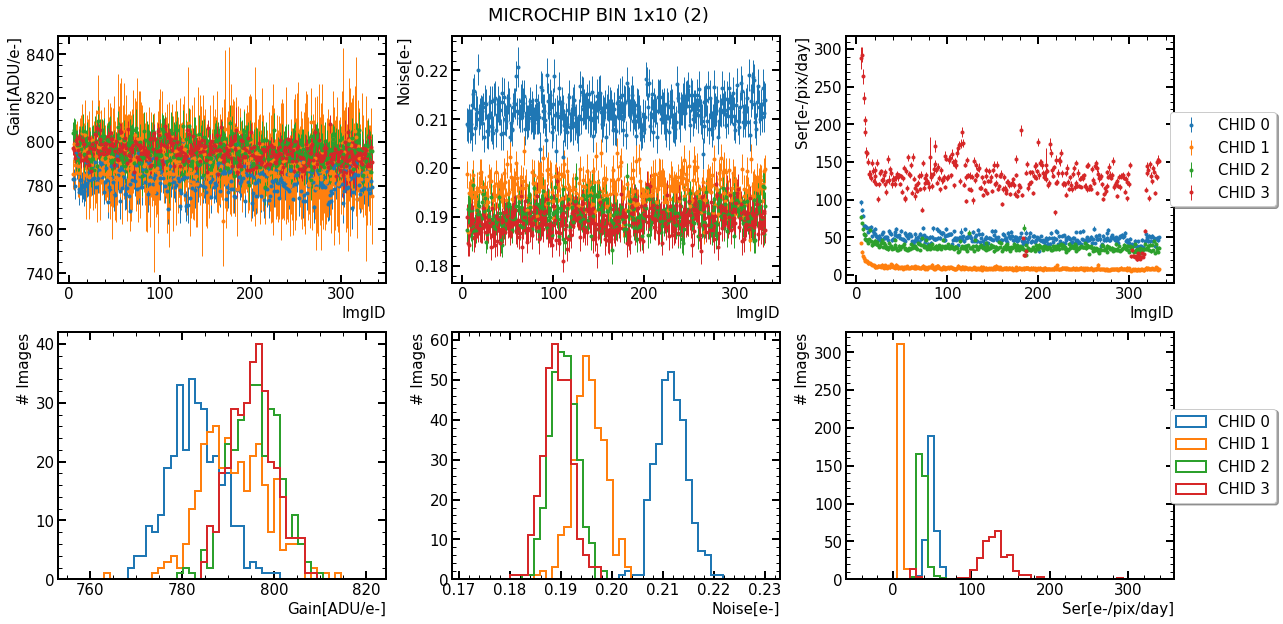

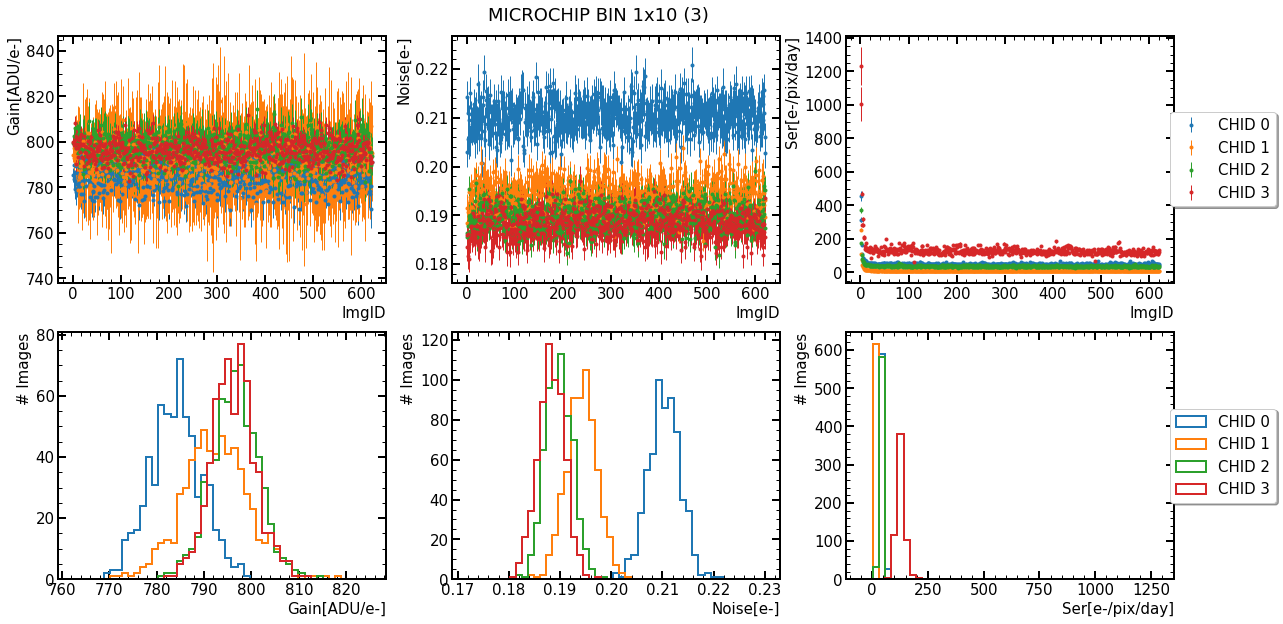

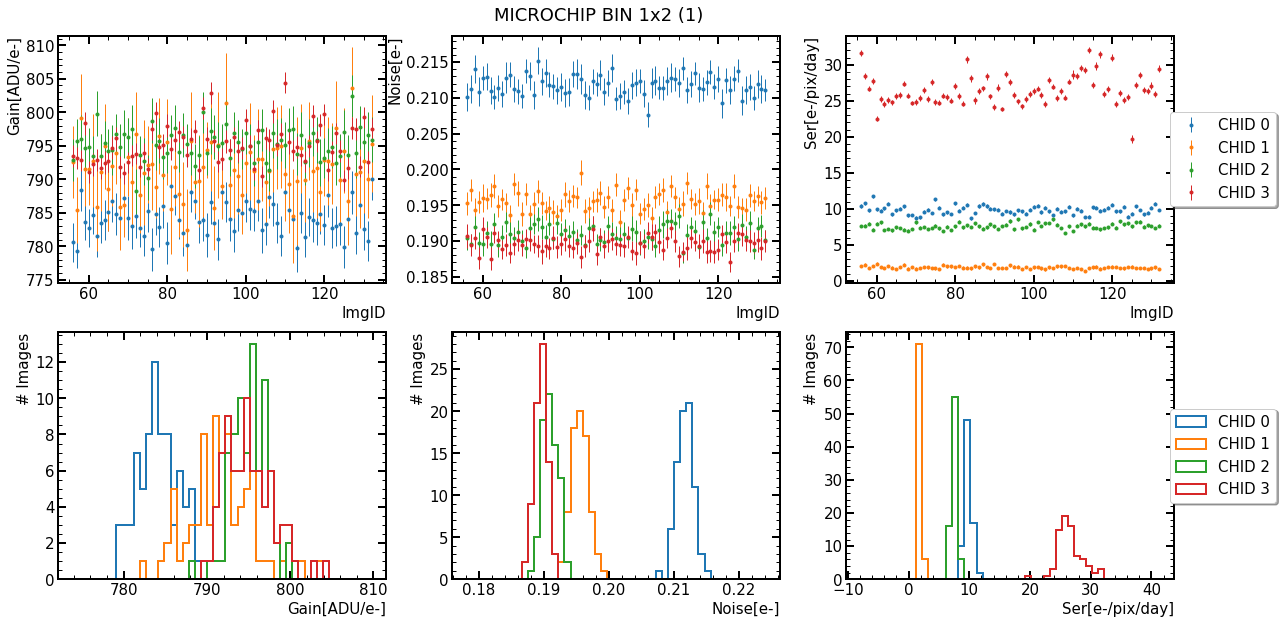

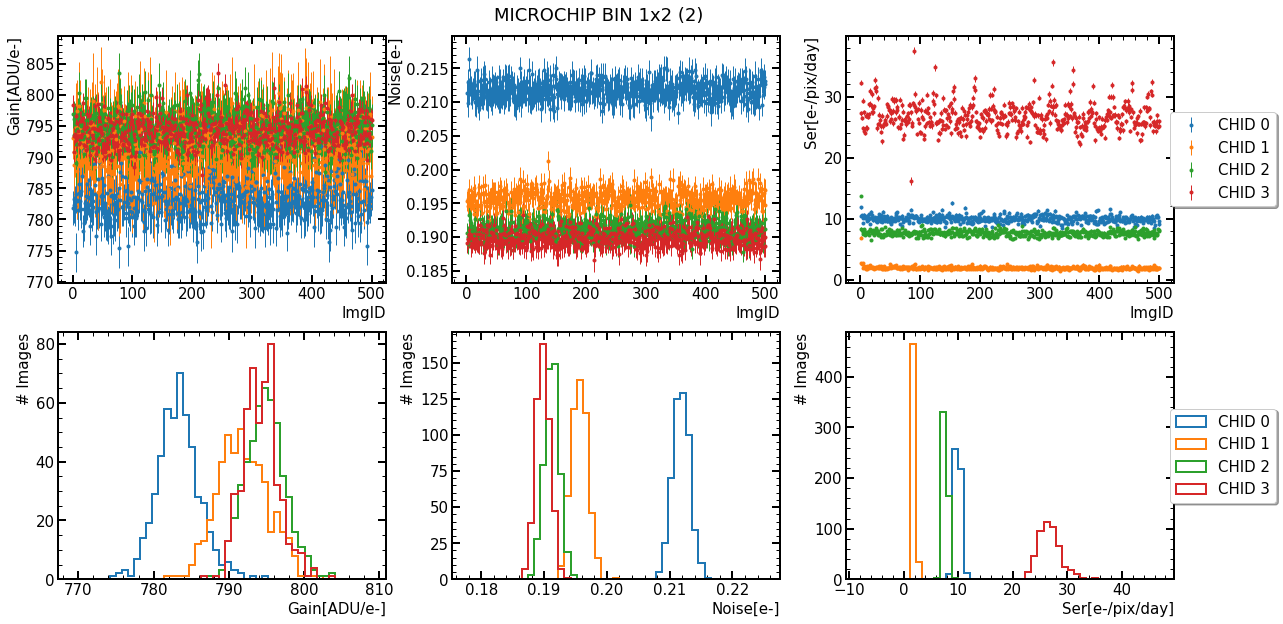

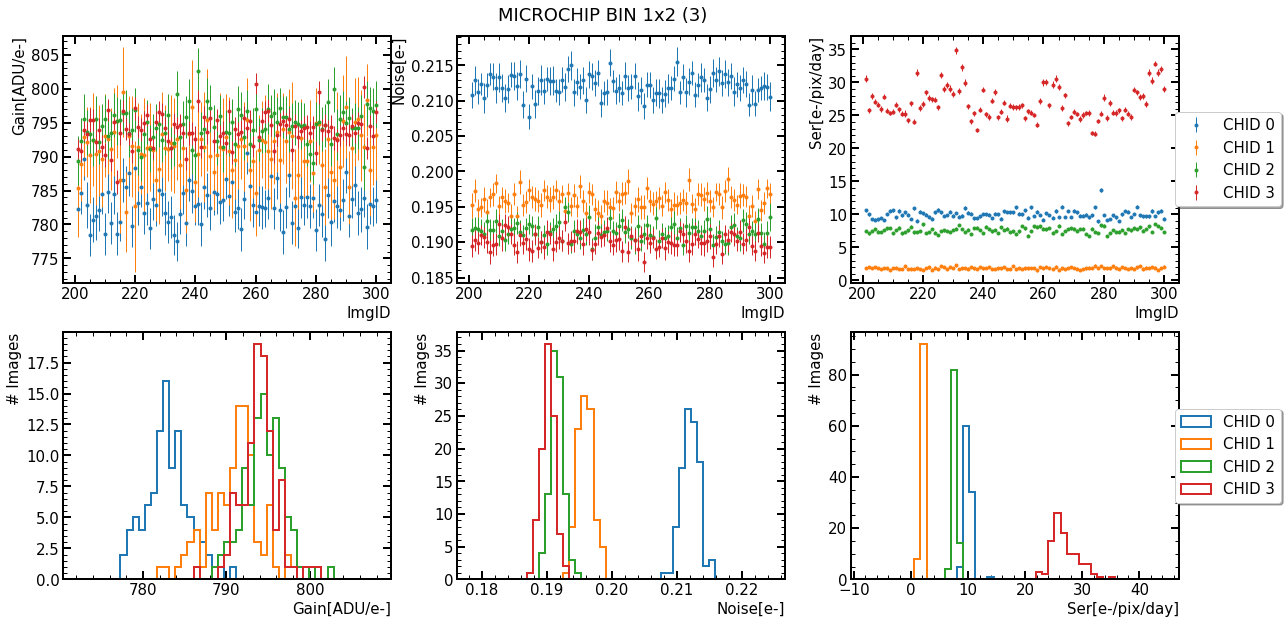

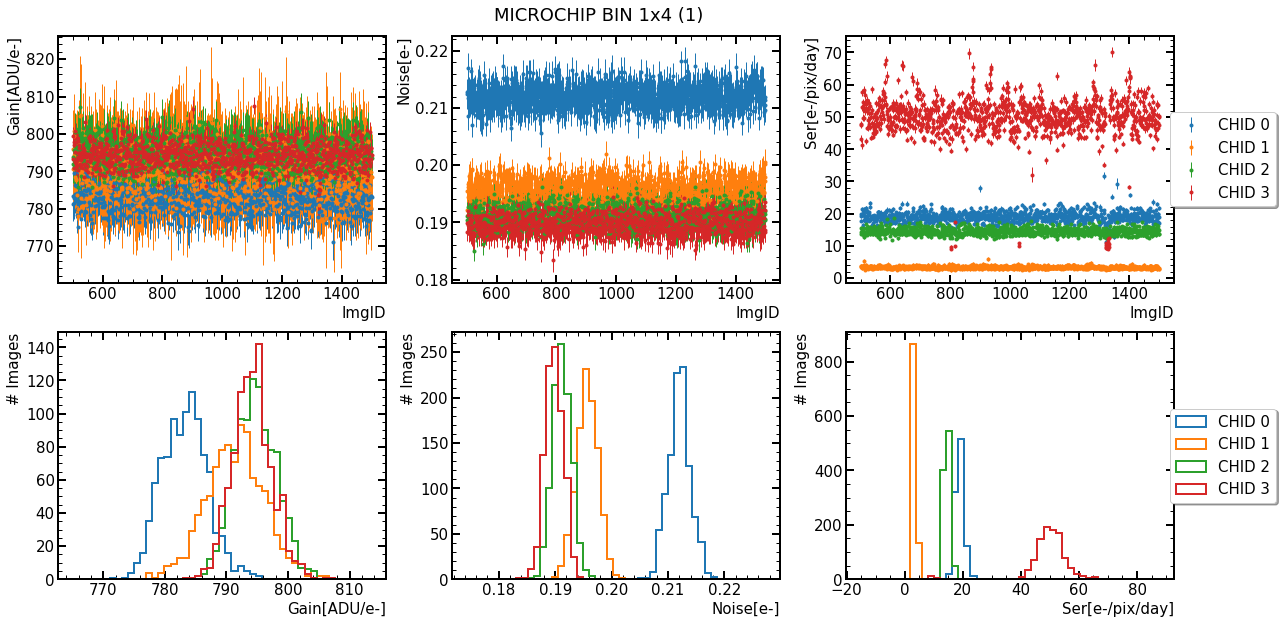

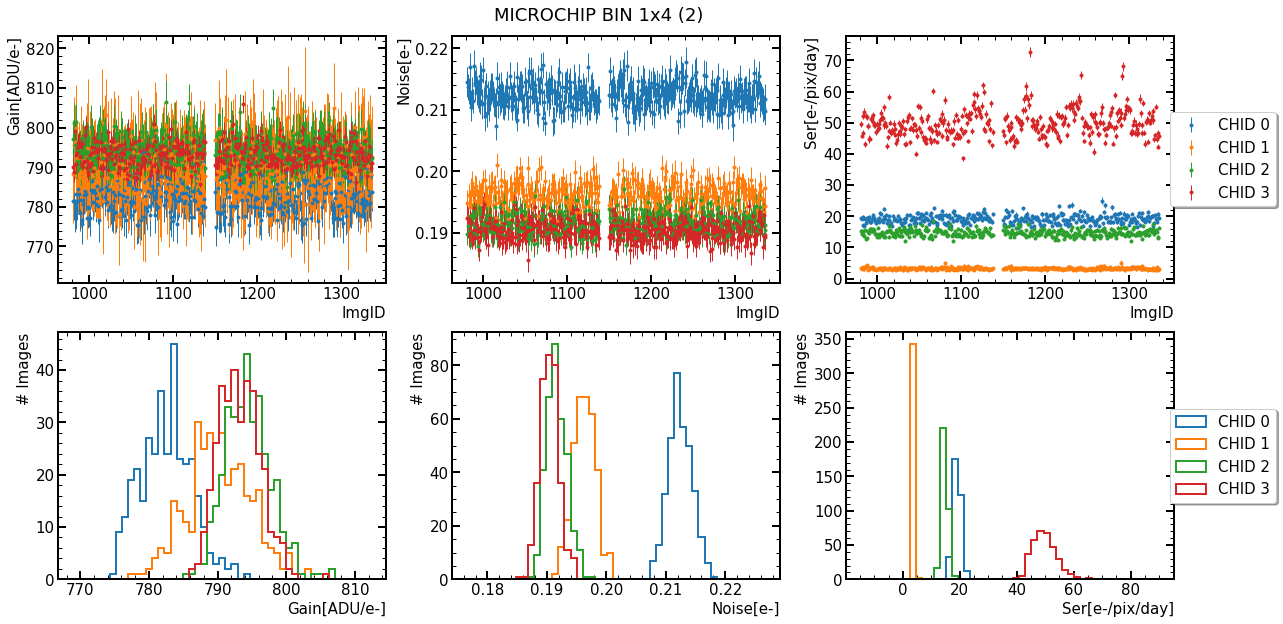

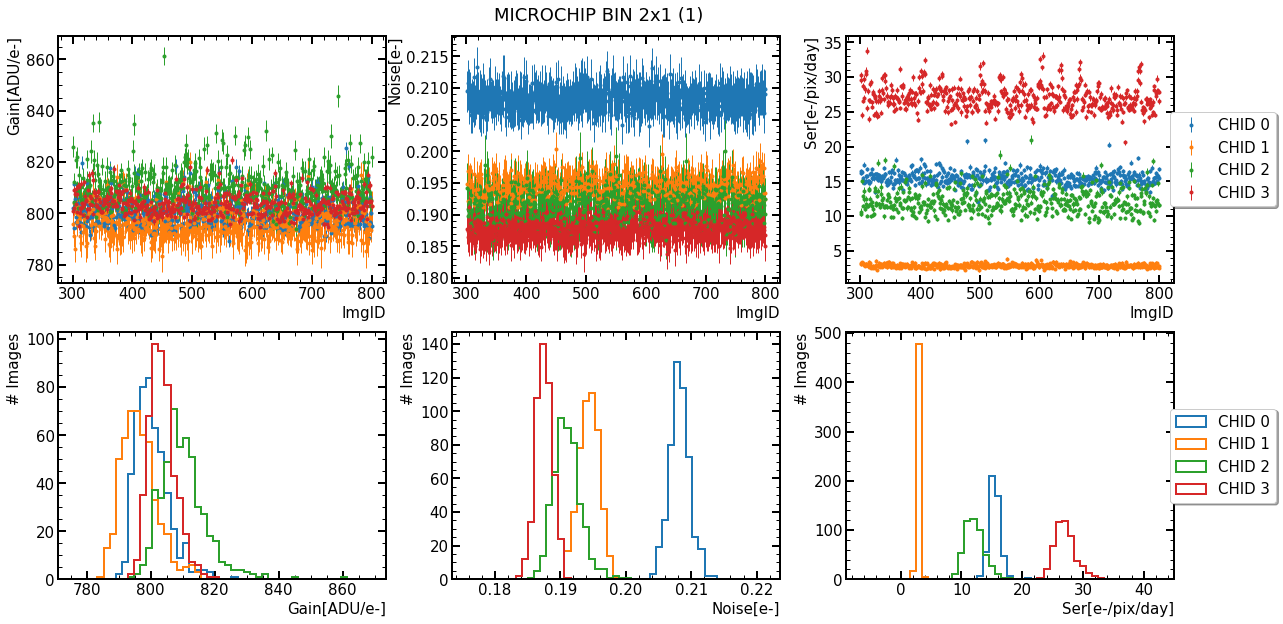

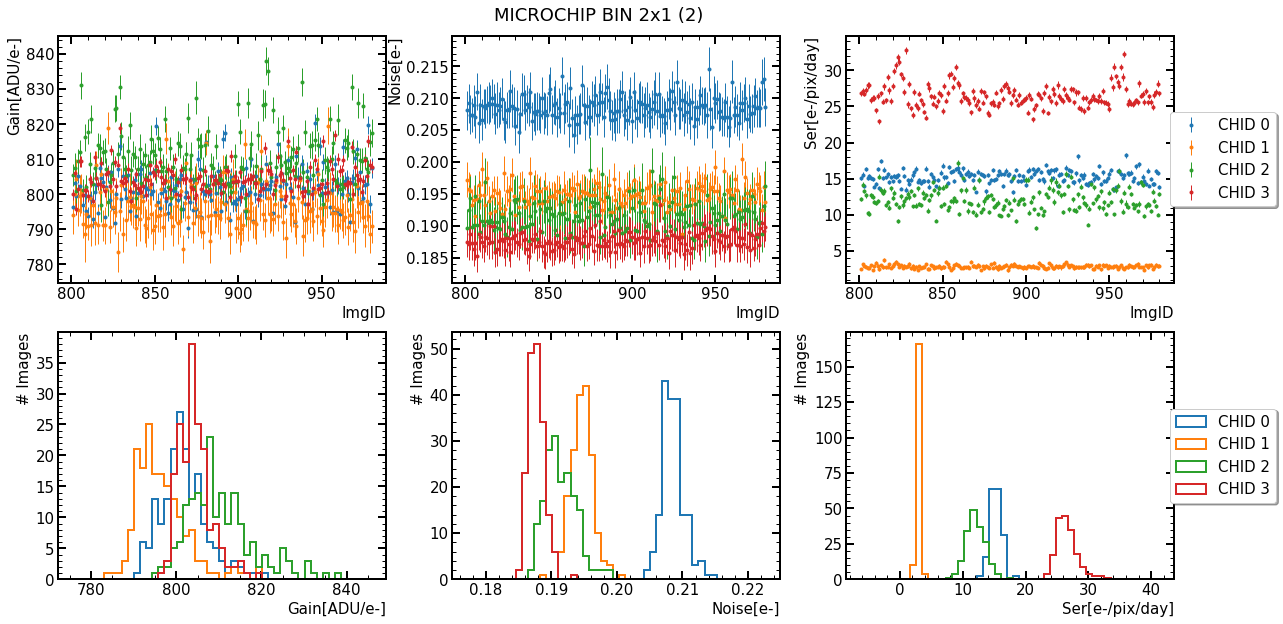

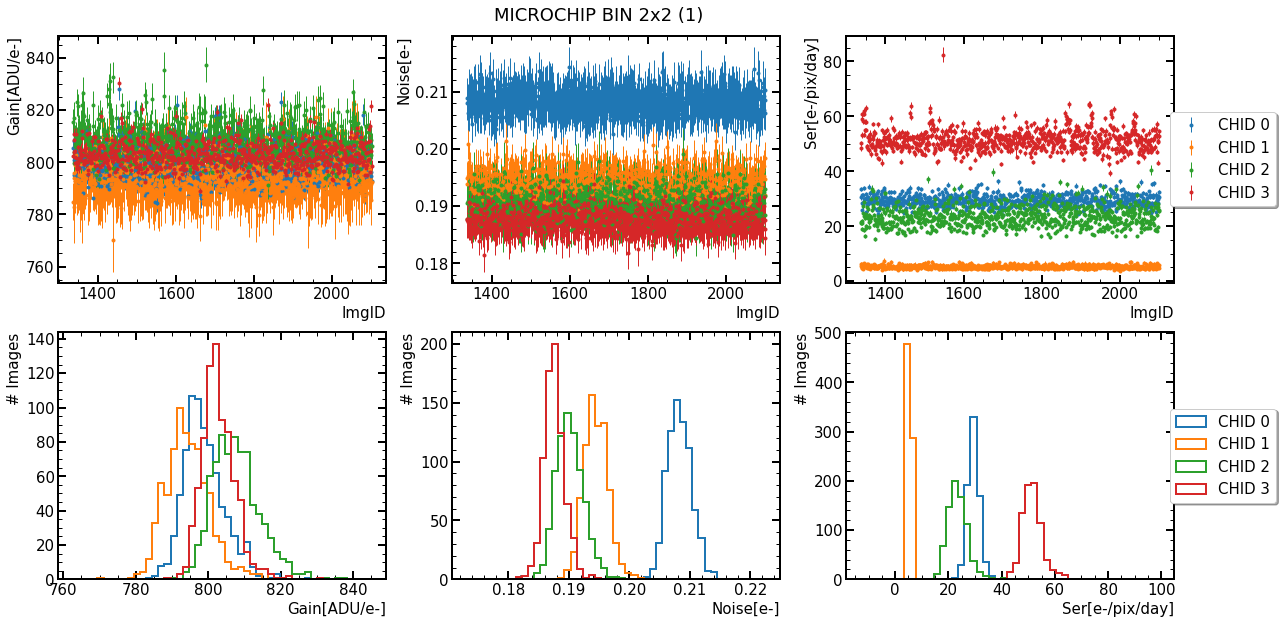

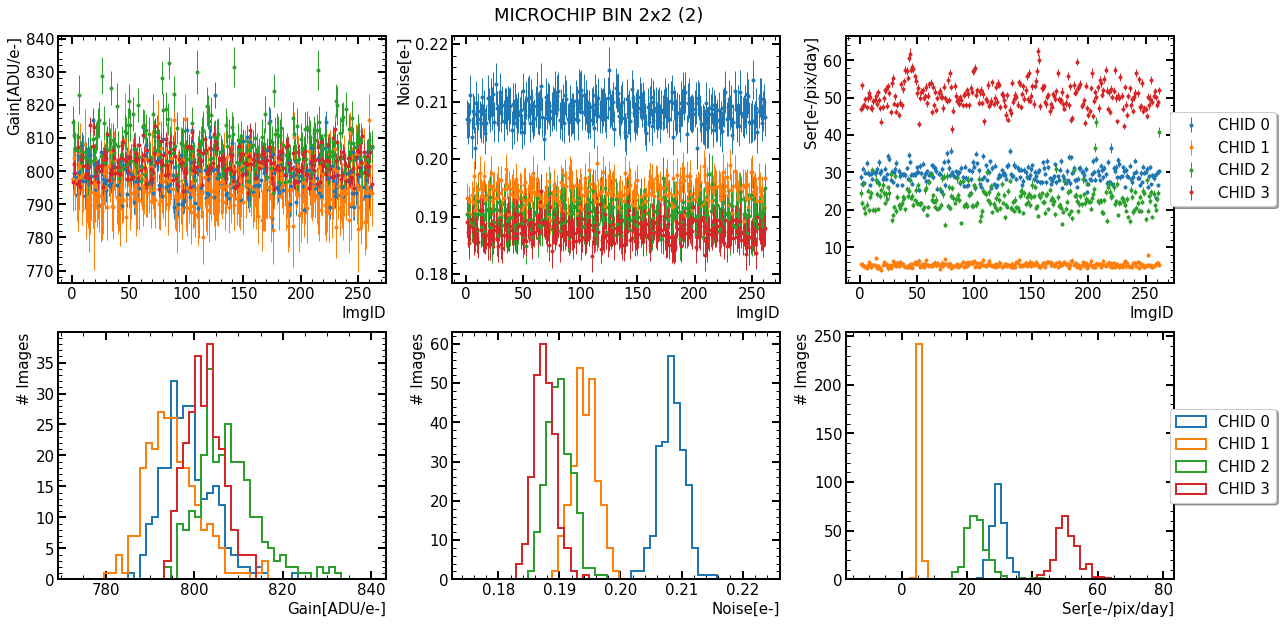

In [4]:
for file in glob.glob('/home/zilvespedro/work/MICROCHIP/MANA/AnaParamsCSV/*csv'):
    df = pd.read_csv(file,na_values=[' nan',' inf',-1000])
    df=df.dropna(how='any')
    fig = plt.figure(figsize=(20,10))
    colors=['tab:blue','tab:orange','tab:green','tab:red']
    plt.subplot(231)
    for i in range(4): plt.errorbar(df[df['CHID']==i]['IMGID'],y=df[df['CHID']==i]['Gain'],yerr=df[df['CHID']==i]['Gain_err'],fmt='.')
    plt.ylabel('Gain[ADU/e-]')
    plt.xlabel('ImgID')

    plt.subplot(232)
    for i in range(4): plt.errorbar(df[df['CHID']==i]['IMGID'],y=df[df['CHID']==i]['Noise'],yerr=df[df['CHID']==i]['Noise_err'],fmt='.')
    plt.ylabel('Noise[e-]')
    plt.xlabel('ImgID')
    
    plt.subplot(233)
    for i in range(4): plt.errorbar(df[df['CHID']==i]['IMGID'],y=df[df['CHID']==i]['Ser'],yerr=df[df['CHID']==i]['Ser_err'],fmt='.',color=colors[i],label='CHID '+str(i))
    plt.ylabel('Ser[e-/pix/day]')
    plt.xlabel('ImgID')
    
    plt.legend(shadow=True,ncol=1,  bbox_to_anchor=[1.15, .5], loc='center')
    plt.subplot(234)
    for i in range(4): plt.hist(df[df['CHID']==i]['Gain'],histtype='step',bins=np.linspace(df['Gain'].min()-df['Gain'].std(),df['Gain'].max()+df['Gain'].std(),50),linewidth=2,color=colors[i])
    plt.xlabel('Gain[ADU/e-]')
    plt.ylabel('# Images')

    plt.subplot(235)
    for i in range(4): plt.hist(df[df['CHID']==i]['Noise'],histtype='step',bins=np.linspace(df['Noise'].min()-df['Noise'].std(),df['Noise'].max()+df['Noise'].std(),50),linewidth=2,color=colors[i],label='CHID '+str(i))
    plt.xlabel('Noise[e-]')
    plt.ylabel('# Images')
    
    plt.subplot(236)
    for i in range(4): plt.hist(df[df['CHID']==i]['Ser'],histtype='step',bins=np.linspace(df['Ser'].min()-df['Ser'].std(),df['Ser'].max()+df['Ser'].std(),50),linewidth=2,color=colors[i],label='CHID '+str(i))
    plt.xlabel('Ser[e-/pix/day]')
    plt.ylabel('# Images')
    
    
    plt.legend(shadow=True,ncol=1,  bbox_to_anchor=[1.15, .5], loc='center')

    bined=file.replace('/home/zilvespedro/work/MICROCHIP/MANA/AnaParamsCSV/AnaParams_','').replace("_"," (").replace(".csv",')')
    plt.suptitle('MICROCHIP BIN '+bined,y=0.92)
    plt.savefig('/home/zilvespedro/work/MICROCHIP/MANA/AnaParamsCSV/plots/Performance'+bined+'.png', bbox_inches='tight', dpi=100)